# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, foi conduzido um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e  construiu um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.



## Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa é o entendimento dos dados. Foram fornecidas 14 variáveis dentro do dataframe. O significado de cada uma dessas variáveis se encontra na tabela.

### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes.


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data do cadastro                                   | Data         |
| id_cliente              |  Identificação própria, única para cada cliente.    | ID           |
| sexo                    |  M = 'Masculino'; F = 'Feminino'                    | M/F          |
| posse_de_veiculo        |  T = 'possui'; F = 'não possui'                     | F(False/T(true)|
| posse_de_imovel         |  T = 'possui'; F = 'não possui'                     | F(False/T(true)|
| qtd_filhos              |  Quantidade de filhos                               | Inteiro |
| tipo_renda              | Tipo de renda (ex: assaliariado, autônomo etc)      | Texto |
| educacao                |  Nível de educação (ex: secundário, superior etc)   | Texto |
| estado_civil            |  Estado civil (ex: solteiro, casado etc)            | Texto |
| tipo_residencia         |  tipo de residência (ex: casa/apartamento, com os pais etc)	  | Texto |
| idade                   |  idade em anos                                      | Inteiro |
| tempo_emprego           |  tempo de emprego em anos                           | Inteiro| 
| qt_pessoas_residencia   |  quantidade de pessoas na residência                | Inteiro|
| renda                   |  Valor da renda apresentada                         | Decimal |





#### Carregando os pacotes


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from patsy import dmatrix

from seaborn import load_dataset

from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

%matplotlib inline


C:\Users\lucca\AppData\Local\Temp\ipykernel_14388\504492860.py:14: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


#### Carregando os dados


In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [3]:
renda.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [4]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

A análise univariada envolve descrever a distribuição de uma única variável, incluindo sua medida central(incluindo a média,mediana, e a Moda (estatística) e dispersão(incluindo a diferença entre o maior e menor valor da amostragem e quantil do conjunto de dados, além da variância e desvio padrão).


### Entendimento dos dados - Bivariadas





A análise estatística bivariada (duas variáveis) permite observar como duas variáveis se comportam na presença uma da outra. Pode-se utilizar a correlação entre as variáveis para realizar uma verificação preliminar do nível de relação entre elas.

In [6]:
renda.corr()

Unnamed: 0  id_cliente  posse_de_veiculo  \
Unnamed: 0               1.000000    0.016565         -0.003302   
id_cliente               0.016565    1.000000         -0.012072   
posse_de_veiculo        -0.003302   -0.012072          1.000000   
posse_de_imovel         -0.000299   -0.102863         -0.014172   
qtd_filhos              -0.002281    0.030296          0.118690   
idade                   -0.001438   -0.057812         -0.178903   
tempo_emprego            0.004102   -0.036373         -0.076155   
qt_pessoas_residencia   -0.003191    0.037951          0.167240   
renda                    0.004901   -0.009129          0.100493   

                       posse_de_imovel  qtd_filhos     idade  tempo_emprego  \
Unnamed: 0                   -0.000299   -0.002281 -0.001438       0.004102   
id_cliente                   -0.102863    0.030296 -0.057812      -0.036373   
posse_de_veiculo             -0.014172    0.118690 -0.178903      -0.076155   
posse_de_imovel               1.000000   -0.022738  0.140510       0.009465   
qtd_filhos                   -0.022738    1.000000 -0.360426      -0.063220   
idade                         0.140510   -0.360426  1.000000       0.321573   
tempo_emprego                 0.009465   -0.063220  0.321573       1.000000   
qt_pessoas_residencia        -0.023415    0.889777 -0.339320      -0.065670   
renda                         0.003880    0.029346  0.022435       0.385013   

                       qt_pessoas_residencia     renda  
Unnamed: 0                         -0.003191  0.004901  
id_cliente                          0.037951 -0.009129  
posse_de_veiculo                    0.167240  0.100493  
posse_de_imovel                    -0.023415  0.003880  
qtd_filhos                          0.889777  0.029346  
idade                              -0.339320  0.022435  
tempo_emprego                      -0.065670  0.385013  
qt_pessoas_residencia               1.000000  0.047842  
renda                               0.047842  1.000000

In [7]:
renda_resumo = renda[['qtd_filhos', 'idade', 'tempo_emprego', 'renda']]
renda_resumo.head(10)

qtd_filhos  idade  tempo_emprego     renda
0           0     26       6.602740   8060.34
1           0     28       7.183562   1852.15
2           0     35       0.838356   2253.89
3           1     30       4.846575   6600.77
4           0     33       4.293151   6475.97
5           0     39       4.345205   1445.87
6           0     55       6.378082   1726.03
7           0     36       3.104110   2515.98
8           0     50      18.605479   3420.34
9           0     60      10.558904  12939.14

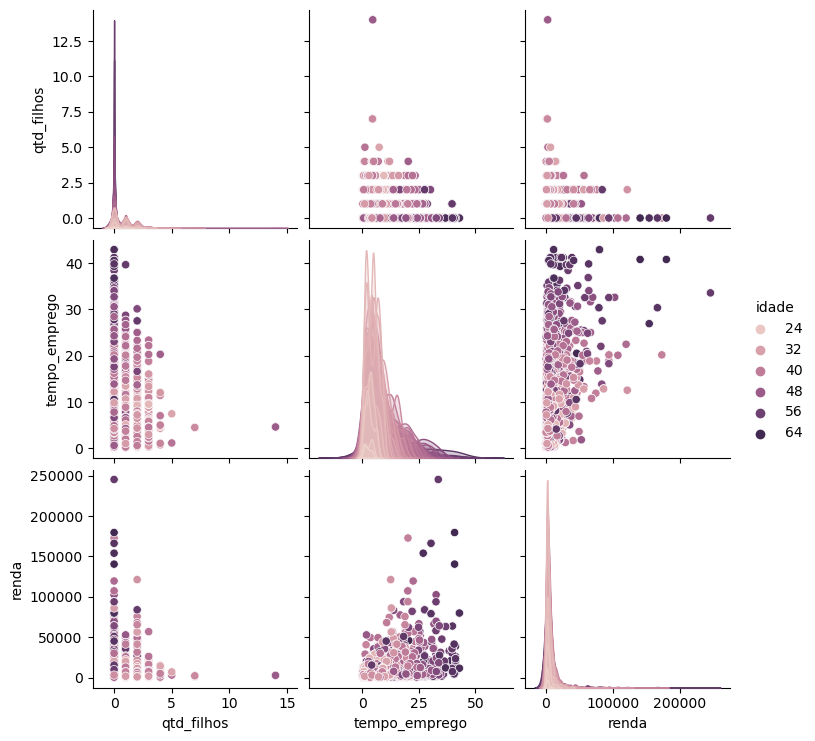

In [8]:
sns.pairplot(
    renda_resumo,
    hue='idade',
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
plt.show()

O gráfico acima demonstra as relações diretas entre duas variáveis que estão sendo comparadas. Numa análise primária pode-se concluir que quanto maior o tempo de emprego maior a renda. Porém, o inverso ocorre se analisarmnos as variáveis quantidade de filhos x renda e quantidade de filhos.

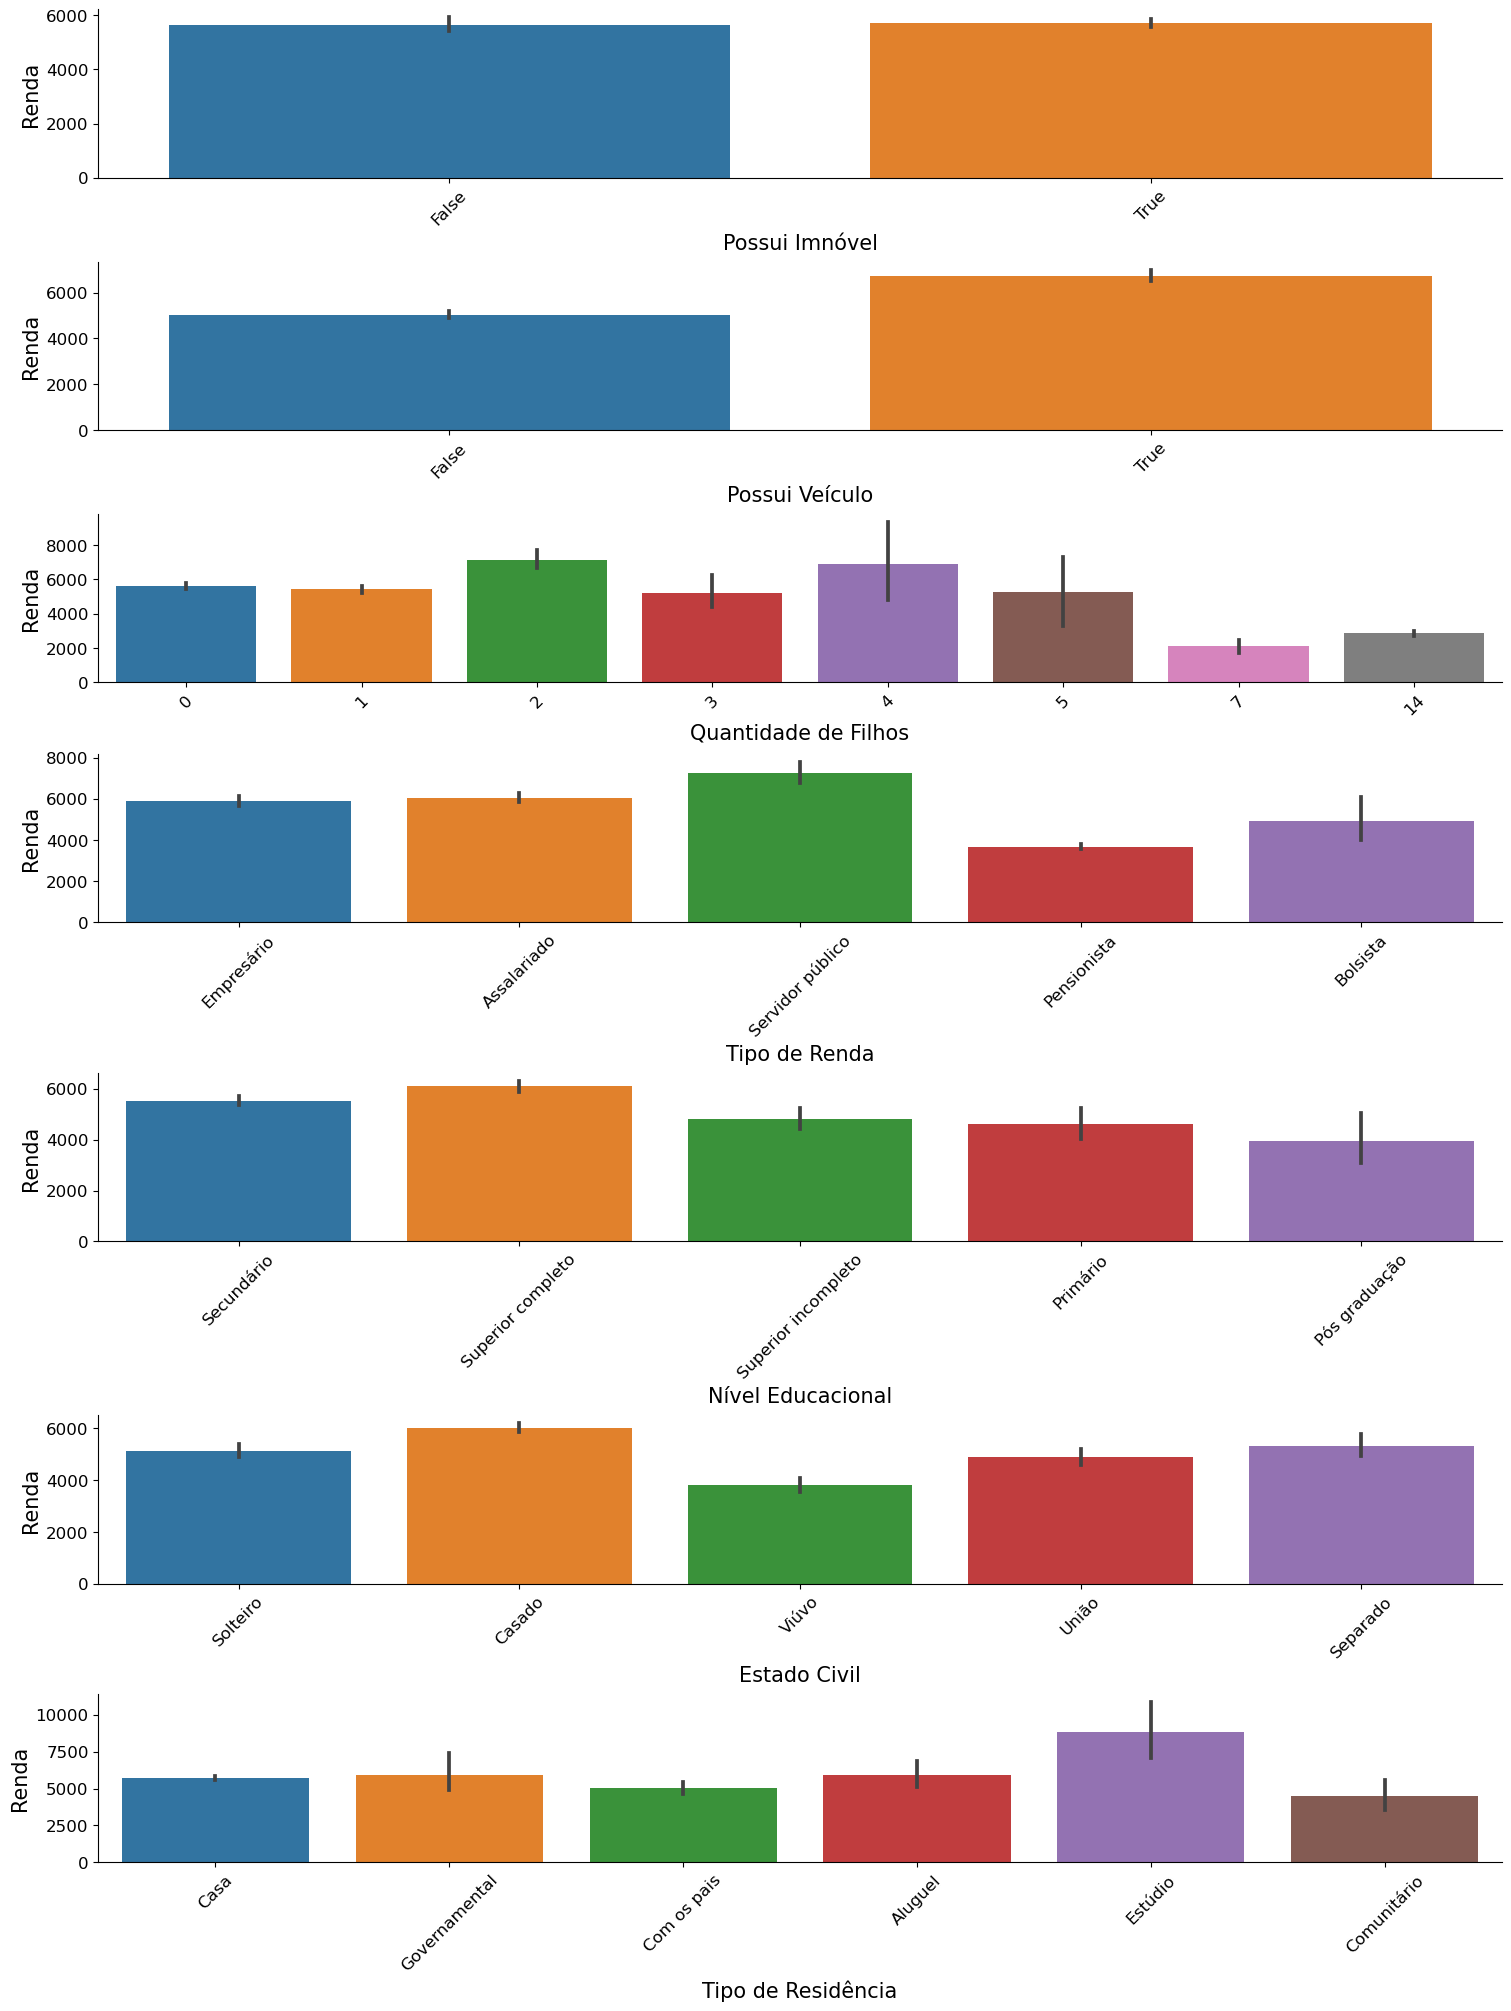

In [9]:
fig, ax = plt.subplots(7,1,figsize=(15,20), constrained_layout=True)
sns.barplot(x='posse_de_imovel',y='renda',data=renda, ax=ax[0])
ax[0].tick_params(axis='x', rotation=45, labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].set_ylabel( "Renda" , size = 15 )
ax[0].set_xlabel( "Possui Imnóvel" , size = 15 )

sns.barplot(x='posse_de_veiculo',y='renda',data=renda, ax=ax[1])
ax[1].tick_params(axis='x', rotation=45, labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].set_ylabel( "Renda" , size = 15 )
ax[1].set_xlabel( "Possui Veículo" , size = 15 )

sns.barplot(x='qtd_filhos',y='renda',data=renda, ax=ax[2])
ax[2].tick_params(axis='x', rotation=45, labelsize=12)
ax[2].tick_params(axis='y', labelsize=12)
ax[2].set_ylabel( "Renda" , size = 15 )
ax[2].set_xlabel( "Quantidade de Filhos" , size = 15 )

sns.barplot(x='tipo_renda',y='renda',data=renda, ax=ax[3])
ax[3].tick_params(axis='x', rotation=45, labelsize=12)
ax[3].tick_params(axis='y', labelsize=12)
ax[3].set_ylabel( "Renda" , size = 15 )
ax[3].set_xlabel( "Tipo de Renda" , size = 15 )

sns.barplot(x='educacao',y='renda',data=renda, ax=ax[4])
ax[4].tick_params(axis='x', rotation=45, labelsize=12)
ax[4].tick_params(axis='y', labelsize=12)
ax[4].set_ylabel( "Renda" , size = 15 )
ax[4].set_xlabel( "Nível Educacional" , size = 15 )

sns.barplot(x='estado_civil',y='renda',data=renda, ax=ax[5])
ax[5].tick_params(axis='x', rotation=45, labelsize=12)
ax[5].tick_params(axis='y', labelsize=12)
ax[5].set_ylabel( "Renda" , size = 15 )
ax[5].set_xlabel( "Estado Civil" , size = 15 )

sns.barplot(x='tipo_residencia',y='renda',data=renda, ax=ax[6])
ax[6].tick_params(axis='x', rotation=45, labelsize=12)
ax[6].tick_params(axis='y', labelsize=12)
ax[6].set_ylabel( "Renda" , size = 15 )
ax[6].set_xlabel( "Tipo de Residência" , size = 15 )
sns.despine()
plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



Usualmente é recomendável que o dataset seja tratado, evitando-se lacunas e informações repetidas. A seguir serão realizados mecanismos que evitam esse tipo de problema.


In [10]:
renda.head(10)

Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   
1           1  2015-01-01        9968    M              True             True   
2           2  2015-01-01        4312    F              True             True   
3           3  2015-01-01       10639    F             False             True   
4           4  2015-01-01        7064    M              True            False   
5           5  2015-01-01       10581    F             False             True   
6           6  2015-01-01        7129    F             False             True   
7           7  2015-01-01        9952    F             False             True   
8           8  2015-01-01         883    F             False             True   
9           9  2015-01-01        8070    M              True             True   

   qtd_filhos        tipo_renda           educacao estado_civil  \
0           0        Empresário         Secundário     Solteiro   
1           0       Assalariado  Superior completo       Casado   
2           0        Empresário  Superior completo       Casado   
3           1  Servidor público  Superior completo       Casado   
4           0       Assalariado         Secundário     Solteiro   
5           0       Assalariado  Superior completo       Casado   
6           0        Empresário  Superior completo        Viúvo   
7           0        Empresário         Secundário       Casado   
8           0       Assalariado         Secundário       Casado   
9           0       Assalariado  Superior completo       Casado   

  tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia     renda  
0            Casa     26       6.602740                    1.0   8060.34  
1            Casa     28       7.183562                    2.0   1852.15  
2            Casa     35       0.838356                    2.0   2253.89  
3            Casa     30       4.846575                    3.0   6600.77  
4   Governamental     33       4.293151                    1.0   6475.97  
5            Casa     39       4.345205                    2.0   1445.87  
6            Casa     55       6.378082                    1.0   1726.03  
7            Casa     36       3.104110                    2.0   2515.98  
8            Casa     50      18.605479                    2.0   3420.34  
9            Casa     60      10.558904                    2.0  12939.14

Vamos eliminar algumas colunas que não serão utilizadas na análise e não possuem representação estatística.

In [11]:
renda = (renda.drop(['Unnamed: 0', 'id_cliente'], axis=1))
renda.head(10)


data_ref sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
0  2015-01-01    F             False             True           0   
1  2015-01-01    M              True             True           0   
2  2015-01-01    F              True             True           0   
3  2015-01-01    F             False             True           1   
4  2015-01-01    M              True            False           0   
5  2015-01-01    F             False             True           0   
6  2015-01-01    F             False             True           0   
7  2015-01-01    F             False             True           0   
8  2015-01-01    F             False             True           0   
9  2015-01-01    M              True             True           0   

         tipo_renda           educacao estado_civil tipo_residencia  idade  \
0        Empresário         Secundário     Solteiro            Casa     26   
1       Assalariado  Superior completo       Casado            Casa     28   
2        Empresário  Superior completo       Casado            Casa     35   
3  Servidor público  Superior completo       Casado            Casa     30   
4       Assalariado         Secundário     Solteiro   Governamental     33   
5       Assalariado  Superior completo       Casado            Casa     39   
6        Empresário  Superior completo        Viúvo            Casa     55   
7        Empresário         Secundário       Casado            Casa     36   
8       Assalariado         Secundário       Casado            Casa     50   
9       Assalariado  Superior completo       Casado            Casa     60   

   tempo_emprego  qt_pessoas_residencia     renda  
0       6.602740                    1.0   8060.34  
1       7.183562                    2.0   1852.15  
2       0.838356                    2.0   2253.89  
3       4.846575                    3.0   6600.77  
4       4.293151                    1.0   6475.97  
5       4.345205                    2.0   1445.87  
6       6.378082                    1.0   1726.03  
7       3.104110                    2.0   2515.98  
8      18.605479                    2.0   3420.34  
9      10.558904                    2.0  12939.14

In [12]:
renda.shape

(15000, 13)

In [13]:
renda.isnull().sum()

data_ref                    0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [14]:
renda = renda.dropna()

In [15]:
renda.shape

(12427, 13)

In [16]:
renda.isnull().sum()

data_ref                 0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [17]:
prev_renda = pd.DataFrame(renda.dtypes, columns = ['tipo'])

prev_renda['n_categorias'] = 0

for var in prev_renda.index:
    prev_renda.loc[var,'n_categorias'] = len(renda.groupby([var]).size())
    
prev_renda

tipo  n_categorias
data_ref                object            15
sexo                    object             2
posse_de_veiculo          bool             2
posse_de_imovel           bool             2
qtd_filhos               int64             8
tipo_renda              object             5
educacao                object             5
estado_civil            object             5
tipo_residencia         object             6
idade                    int64            46
tempo_emprego          float64          2589
qt_pessoas_residencia  float64             9
renda                  float64          8126

In [18]:
renda = renda.reset_index()
renda.head(20)

index    data_ref sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
0       0  2015-01-01    F             False             True           0   
1       1  2015-01-01    M              True             True           0   
2       2  2015-01-01    F              True             True           0   
3       3  2015-01-01    F             False             True           1   
4       4  2015-01-01    M              True            False           0   
5       5  2015-01-01    F             False             True           0   
6       6  2015-01-01    F             False             True           0   
7       7  2015-01-01    F             False             True           0   
8       8  2015-01-01    F             False             True           0   
9       9  2015-01-01    M              True             True           0   
10     10  2015-01-01    M             False            False           0   
11     13  2015-01-01    F              True            False           0   
12     14  2015-01-01    M              True             True           0   
13     15  2015-01-01    M              True             True           1   
14     16  2015-01-01    F             False            False           0   
15     17  2015-01-01    F              True             True           0   
16     18  2015-01-01    M              True             True           1   
17     19  2015-01-01    M             False             True           0   
18     20  2015-01-01    M              True             True           1   
19     24  2015-01-01    M              True             True           1   

          tipo_renda           educacao estado_civil tipo_residencia  idade  \
0         Empresário         Secundário     Solteiro            Casa     26   
1        Assalariado  Superior completo       Casado            Casa     28   
2         Empresário  Superior completo       Casado            Casa     35   
3   Servidor público  Superior completo       Casado            Casa     30   
4        Assalariado         Secundário     Solteiro   Governamental     33   
5        Assalariado  Superior completo       Casado            Casa     39   
6         Empresário  Superior completo        Viúvo            Casa     55   
7         Empresário         Secundário       Casado            Casa     36   
8        Assalariado         Secundário       Casado            Casa     50   
9        Assalariado  Superior completo       Casado            Casa     60   
10        Empresário         Secundário       Casado            Casa     39   
11       Assalariado  Superior completo       Casado            Casa     41   
12        Empresário  Superior completo       Casado            Casa     58   
13       Assalariado         Secundário     Solteiro            Casa     31   
14        Empresário         Secundário        União            Casa     53   
15  Servidor público         Secundário     Solteiro            Casa     45   
16       Assalariado  Superior completo     Separado            Casa     44   
17  Servidor público  Superior completo       Casado            Casa     26   
18       Assalariado         Secundário     Solteiro            Casa     40   
19        Empresário         Secundário       Casado            Casa     24   

    tempo_emprego  qt_pessoas_residencia     renda  
0        6.602740                    1.0   8060.34  
1        7.183562                    2.0   1852.15  
2        0.838356                    2.0   2253.89  
3        4.846575                    3.0   6600.77  
4        4.293151                    1.0   6475.97  
5        4.345205                    2.0   1445.87  
6        6.378082                    1.0   1726.03  
7        3.104110                    2.0   2515.98  
8       18.605479                    2.0   3420.34  
9       10.558904                    2.0  12939.14  
10       2.087671                    2.0   6402.41  
11      15.041096                    2.0    581.18  
12       4.586301                    

In [19]:
renda_dummies = renda.drop(['data_ref', 'index'], axis=1)
renda_dummies = pd.get_dummies(renda_dummies)
renda_dummies.head()

posse_de_veiculo  posse_de_imovel  qtd_filhos  idade  tempo_emprego  \
0             False             True           0     26       6.602740   
1              True             True           0     28       7.183562   
2              True             True           0     35       0.838356   
3             False             True           1     30       4.846575   
4              True            False           0     33       4.293151   

   qt_pessoas_residencia    renda  sexo_F  sexo_M  tipo_renda_Assalariado  \
0                    1.0  8060.34       1       0                       0   
1                    2.0  1852.15       0       1                       1   
2                    2.0  2253.89       1       0                       0   
3                    3.0  6600.77       1       0                       0   
4                    1.0  6475.97       0       1                       1   

   ...  estado_civil_Separado  estado_civil_Solteiro  estado_civil_União  \
0  ...                      0                      1                   0   
1  ...                      0                      0                   0   
2  ...                      0                      0                   0   
3  ...                      0                      0                   0   
4  ...                      0                      1                   0   

   estado_civil_Viúvo  tipo_residencia_Aluguel  tipo_residencia_Casa  \
0                   0                        0                     1   
1                   0                        0                     1   
2                   0                        0                     1   
3                   0                        0                     1   
4                   0                        0                     0   

   tipo_residencia_Com os pais  tipo_residencia_Comunitário  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   tipo_residencia_Estúdio  tipo_residencia_Governamental  
0                        0                              0  
1                        0                              0  
2                        0                              0  
3                        0                              0  
4                        0                              1  

[5 rows x 30 columns]

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


Primeiramente vamos dividir o dataframe em uma base de treino e teste e depois vamos construir uma arvore de regressão.


### Rodando o modelo


Árvore de regressão


In [20]:
X = renda_dummies.drop("renda",axis = 1)
y = renda_dummies["renda"]

In [21]:
X.head()

posse_de_veiculo  posse_de_imovel  qtd_filhos  idade  tempo_emprego  \
0             False             True           0     26       6.602740   
1              True             True           0     28       7.183562   
2              True             True           0     35       0.838356   
3             False             True           1     30       4.846575   
4              True            False           0     33       4.293151   

   qt_pessoas_residencia  sexo_F  sexo_M  tipo_renda_Assalariado  \
0                    1.0       1       0                       0   
1                    2.0       0       1                       1   
2                    2.0       1       0                       0   
3                    3.0       1       0                       0   
4                    1.0       0       1                       1   

   tipo_renda_Bolsista  ...  estado_civil_Separado  estado_civil_Solteiro  \
0                    0  ...                      0                      1   
1                    0  ...                      0                      0   
2                    0  ...                      0                      0   
3                    0  ...                      0                      0   
4                    0  ...                      0                      1   

   estado_civil_União  estado_civil_Viúvo  tipo_residencia_Aluguel  \
0                   0                   0                        0   
1                   0                   0                        0   
2                   0                   0                        0   
3                   0                   0                        0   
4                   0                   0                        0   

   tipo_residencia_Casa  tipo_residencia_Com os pais  \
0                     1                            0   
1                     1                            0   
2                     1                            0   
3                     1                            0   
4                     0                            0   

   tipo_residencia_Comunitário  tipo_residencia_Estúdio  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   tipo_residencia_Governamental  
0                              0  
1                              0  
2                              0  
3                              0  
4                              1  

[5 rows x 29 columns]

In [22]:
y.head()

0    8060.34
1    1852.15
2    2253.89
3    6600.77
4    6475.97
Name: renda, dtype: float64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=2360873)

In [24]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=15)

regr_1.fit(X_test, y_test)
regr_2.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=15)

In [25]:
df_dtr_mse = mean_squared_error(y_test, regr_1.predict(X_test))
df_dtr_r2 = regr_1.score(X_test, y_test)
template = "Árvore teste profundidade: {0}, MSE: {1:.2f}, R2: {2:.6f}"
print(template.format(regr_1.get_depth(), df_dtr_mse, df_dtr_r2))

Árvore teste profundidade: 2, MSE: 45822459.25, R2: 0.266865


In [26]:
df_dtr_mse = mean_squared_error(y_test, regr_2.predict(X_test))
df_dtr_r2 = regr_2.score(X_test, y_test)
template = "Árvore teste profundidade: {0}, MSE: {1:.2f}, R2: {2:.6f}"
print(template.format(regr_2.get_depth(), df_dtr_mse, df_dtr_r2))

Árvore teste profundidade: 15, MSE: 10679282.42, R2: 0.829137


In [27]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(regr_2, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [27]:
regr_3 = DecisionTreeRegressor(max_depth=2)
regr_4 = DecisionTreeRegressor(max_depth=15)

regr_3.fit(X_train, y_train)
regr_4.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15)

In [28]:
df_dtr_mse_train = mean_squared_error(y_train, regr_3.predict(X_train))
df_dtr_r2_train = regr_3.score(X_train, y_train)
template = "Árvore teste profundidade: {0}, MSE: {1:.2f}, R2: {2:.6f}"
print(template.format(regr_3.get_depth(), df_dtr_mse_train, df_dtr_r2_train))

Árvore teste profundidade: 2, MSE: 60493276.82, R2: 0.284370


In [29]:
df_dtr_mse_train = mean_squared_error(y_train, regr_4.predict(X_train))
df_dtr_r2_train = regr_4.score(X_train, y_train)
template = "Árvore teste profundidade: {0}, MSE: {1:.2f}, R2: {2:.6f}"
print(template.format(regr_4.get_depth(), df_dtr_mse_train, df_dtr_r2_train))

Árvore teste profundidade: 15, MSE: 17221144.17, R2: 0.796275


In [30]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(regr_4, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

Agora vamos utilizar o método de regressão Ridge:

In [31]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12427 entries, 0 to 12426
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  12427 non-null  int64  
 1   data_ref               12427 non-null  object 
 2   sexo                   12427 non-null  object 
 3   posse_de_veiculo       12427 non-null  bool   
 4   posse_de_imovel        12427 non-null  bool   
 5   qtd_filhos             12427 non-null  int64  
 6   tipo_renda             12427 non-null  object 
 7   educacao               12427 non-null  object 
 8   estado_civil           12427 non-null  object 
 9   tipo_residencia        12427 non-null  object 
 10  idade                  12427 non-null  int64  
 11  tempo_emprego          12427 non-null  float64
 12  qt_pessoas_residencia  12427 non-null  float64
 13  renda                  12427 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(6)
memory usa

In [32]:
modelo = 'renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia + qtd_filhos'
md = smf.ols(modelo, data = renda)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.001
                         , alpha = 0.005)


reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     201.7
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        13:17:16   Log-Likelihood:            -1.2880e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12406   BIC:                         2.578e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5211.5527   2501.465     -2.083      0.037   -1.01e+04    -308.292
C(sexo)[T.M]                      6012.5858    155.726     38.610      0.000    5707.340    6317.832
C(posse_de_veiculo)[T.True]         62.7495    150.465      0.417      0.677    -232.186     357.685
C(posse_de_imovel)[T.True]         372.0577    148.822      2.500      0.012      80.343     663.773
educacao[T.Pós graduação]         1357.6468   1691.327      0.803      0.422   -1957.617    4672.911
educacao[T.Secundário]             679.9616    766.295      0.887      0.375    -822.095    2182.018
educacao[T.Superior completo]     1351.6946    768.622      1.759      0.079    -154.925    2858.314
educacao[T.Superior incompleto]    348.3263    827.553      0.421      0.674   -1273.807    1970.459
estado_civil[T.Separado]          1101.0993   1184.078      0.930      0.352   -1219.877    3422.076
estado_civil[T.Solteiro]           768.2827   1159.266      0.663      0.508   -1504.058    3040.623
estado_civil[T.União]             -427.0078    267.815     -1.594      0.111    -951.967      97.951
estado_civil[T.Viúvo]              916.8890   1230.207      0.745      0.456   -1494.507    3328.285
tipo_residencia[T.Casa]           -298.8712    576.380     -0.519      0.604   -1428.665     830.922
tipo_residencia[T.Com os pais]    -455.1854    642.362     -0.709      0.479   -1714.314     803.943
tipo_residencia[T.Comunitário]    -584.2604   1121.376     -0.521      0.602   -2782.331    1613.810
tipo_residencia[T.Estúdio]         186.3163   1056.458      0.176      0.860   -1884.506    2257.139
tipo_residencia[T.Governamental]    86.9789    702.385      0.124      0.901   -1289.805    1463.762
idade                               40.7862      8.520      4.787      0.000      24.085      57.487
tempo_emprego                      549.6470     10.929     50.292      0.000     528.224     571.070
qt_pessoas_residencia             1188.2018   1146.888      1.036      0.300   -1059.877    3436.281
qtd_filhos                       -1069.9553   1149.000     -0.931      0.352   -3322.174    1182.263
==============================================================================
Omnibus:                    17535.414   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9771327.389
Skew:                           8.097   Prob(JB):                         0.00
Kurtosis:                     139.414   Cond. No.                     2.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
stron

In [33]:
modelo = 'renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia + qtd_filhos'
md = smf.ols(modelo, data = renda)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.001
                         , alpha = 1)


reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     201.7
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        13:17:17   Log-Likelihood:            -1.2880e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12406   BIC:                         2.578e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5211.5527   2501.465     -2.083      0.037   -1.01e+04    -308.292
C(sexo)[T.M]                      6012.5858    155.726     38.610      0.000    5707.340    6317.832
C(posse_de_veiculo)[T.True]         62.7495    150.465      0.417      0.677    -232.186     357.685
C(posse_de_imovel)[T.True]         372.0577    148.822      2.500      0.012      80.343     663.773
educacao[T.Pós graduação]         1357.6468   1691.327      0.803      0.422   -1957.617    4672.911
educacao[T.Secundário]             679.9616    766.295      0.887      0.375    -822.095    2182.018
educacao[T.Superior completo]     1351.6946    768.622      1.759      0.079    -154.925    2858.314
educacao[T.Superior incompleto]    348.3263    827.553      0.421      0.674   -1273.807    1970.459
estado_civil[T.Separado]          1101.0993   1184.078      0.930      0.352   -1219.877    3422.076
estado_civil[T.Solteiro]           768.2827   1159.266      0.663      0.508   -1504.058    3040.623
estado_civil[T.União]             -427.0078    267.815     -1.594      0.111    -951.967      97.951
estado_civil[T.Viúvo]              916.8890   1230.207      0.745      0.456   -1494.507    3328.285
tipo_residencia[T.Casa]           -298.8712    576.380     -0.519      0.604   -1428.665     830.922
tipo_residencia[T.Com os pais]    -455.1854    642.362     -0.709      0.479   -1714.314     803.943
tipo_residencia[T.Comunitário]    -584.2604   1121.376     -0.521      0.602   -2782.331    1613.810
tipo_residencia[T.Estúdio]         186.3163   1056.458      0.176      0.860   -1884.506    2257.139
tipo_residencia[T.Governamental]    86.9789    702.385      0.124      0.901   -1289.805    1463.762
idade                               40.7862      8.520      4.787      0.000      24.085      57.487
tempo_emprego                      549.6470     10.929     50.292      0.000     528.224     571.070
qt_pessoas_residencia             1188.2018   1146.888      1.036      0.300   -1059.877    3436.281
qtd_filhos                       -1069.9553   1149.000     -0.931      0.352   -3322.174    1182.263
==============================================================================
Omnibus:                    17535.414   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9771327.389
Skew:                           8.097   Prob(JB):                         0.00
Kurtosis:                     139.414   Cond. No.                     2.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
stron

In [34]:
modelo = 'renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia + qtd_filhos'
md = smf.ols(modelo, data = renda)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.001
                         , alpha = 0.1)


reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     201.7
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        13:17:17   Log-Likelihood:            -1.2880e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12406   BIC:                         2.578e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5211.5527   2501.465     -2.083      0.037   -1.01e+04    -308.292
C(sexo)[T.M]                      6012.5858    155.726     38.610      0.000    5707.340    6317.832
C(posse_de_veiculo)[T.True]         62.7495    150.465      0.417      0.677    -232.186     357.685
C(posse_de_imovel)[T.True]         372.0577    148.822      2.500      0.012      80.343     663.773
educacao[T.Pós graduação]         1357.6468   1691.327      0.803      0.422   -1957.617    4672.911
educacao[T.Secundário]             679.9616    766.295      0.887      0.375    -822.095    2182.018
educacao[T.Superior completo]     1351.6946    768.622      1.759      0.079    -154.925    2858.314
educacao[T.Superior incompleto]    348.3263    827.553      0.421      0.674   -1273.807    1970.459
estado_civil[T.Separado]          1101.0993   1184.078      0.930      0.352   -1219.877    3422.076
estado_civil[T.Solteiro]           768.2827   1159.266      0.663      0.508   -1504.058    3040.623
estado_civil[T.União]             -427.0078    267.815     -1.594      0.111    -951.967      97.951
estado_civil[T.Viúvo]              916.8890   1230.207      0.745      0.456   -1494.507    3328.285
tipo_residencia[T.Casa]           -298.8712    576.380     -0.519      0.604   -1428.665     830.922
tipo_residencia[T.Com os pais]    -455.1854    642.362     -0.709      0.479   -1714.314     803.943
tipo_residencia[T.Comunitário]    -584.2604   1121.376     -0.521      0.602   -2782.331    1613.810
tipo_residencia[T.Estúdio]         186.3163   1056.458      0.176      0.860   -1884.506    2257.139
tipo_residencia[T.Governamental]    86.9789    702.385      0.124      0.901   -1289.805    1463.762
idade                               40.7862      8.520      4.787      0.000      24.085      57.487
tempo_emprego                      549.6470     10.929     50.292      0.000     528.224     571.070
qt_pessoas_residencia             1188.2018   1146.888      1.036      0.300   -1059.877    3436.281
qtd_filhos                       -1069.9553   1149.000     -0.931      0.352   -3322.174    1182.263
==============================================================================
Omnibus:                    17535.414   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9771327.389
Skew:                           8.097   Prob(JB):                         0.00
Kurtosis:                     139.414   Cond. No.                     2.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
stron

Pode-se perceber que a alteração do alpha não tem influência sobre o R². Com isso adotaremos alpha = 1.

Foi realizada a subtração das variáveis com o p value maiores que 5%. 

In [35]:
modelo = 'renda ~ C(sexo) +  C(posse_de_imovel)  + idade + tempo_emprego '
md = smf.ols(modelo, data = renda)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.001
                         , alpha = 1)


reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     837.8
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        13:17:17   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12422   BIC:                         2.577e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -2121.6370    329.140     -6.446      0.000   -2766.803   -1476.471
C(sexo)[T.M]                6045.7894    145.591     41.526      0.000    5760.409    6331.169
C(posse_de_imovel)[T.True]   394.7377    145.657      2.710      0.007     109.228     680.247
idade                         37.5533      7.838      4.791      0.000      22.189      52.918
tempo_emprego                550.4590     10.903     50.485      0.000     529.087     571.831
==============================================================================
Omnibus:                    17506.453   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9670624.952
Skew:                           8.073   Prob(JB):                         0.00
Kurtosis:                     138.705   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Na tentativa de melhorar o R² com o método Ridge, será realizada uma transformação logarítmica na variável resposta renda.

In [36]:
modelo = 'np.log(renda) ~ C(sexo) +  C(posse_de_imovel)  + idade + tempo_emprego '
md = smf.ols(modelo, data = renda)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.001
                         , alpha = 1)


reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1310.
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        13:17:17   Log-Likelihood:                -13685.
No. Observations:               12427   AIC:                         2.738e+04
Df Residuals:                   12422   BIC:                         2.743e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.2790      0.031    233.591      0.000       7.218       7.340
C(sexo)[T.M]                   0.7895      0.014     57.276      0.000       0.762       0.817
C(posse_de_imovel)[T.True]     0.0898      0.014      6.512      0.000       0.063       0.117
idade                          0.0042      0.001      5.635      0.000       0.003       0.006
tempo_emprego                  0.0610      0.001     59.110      0.000       0.059       0.063
==============================================================================
Omnibus:                        1.194   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.551   Jarque-Bera (JB):                1.174
Skew:                           0.023   Prob(JB):                        0.556
Kurtosis:                       3.012   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Etapa 5 Crisp-DM: Avaliação dos resultados


Como esperado, com a transformação logarítmica, o R² teve um aumento sigbnificativo na regressão Ridge.
Entretanto, a arvore de regressão apresentou um R² muito melhor que a regressão Rigde nas bases de treino e teste.

Ao analisar a árvore de regressão pode-se observar com facilidade suas quebras e com quais variáveis deseja-se trabalhar, possibilitando prever a renda seguindo as iterações entre essas determinadas variáveis.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

Nessa etapa colocamos em uso o modelo desenvolvido. A implementação do modelo desenvolvido pode auxiliar a prever a renda dos clientes mesmo que não seja fornecido nenhum tipo de olerite, possibilitando a instituição financeira a oferecer tipos de serviços diferenciados aos clientes. 